In [1]:
import torch
import torch.nn as nn
from torchvision.transforms import v2 as transforms
from utils.dataset import MixtureDataset, OffsetDataset, ImagesFolderDataset, OffsetDataset_label
from tqdm.notebook import tqdm
from models.convnextv2 import convnextv2_wm
from utils.utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
data_number = 10000
ratios = [0.95, 0.05]
batch_size = 32
lr=5e-5
epochs = 50

pruning_interval = 10
pruning_rate = 0.1

In [3]:
transform = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
])

folders = ['/home/ubuntu/data/imagenet/val/', '/home/ubuntu/data/dctdwtsvd/']

mix_dataset = MixtureDataset(folders=folders, num_dataset=data_number, ratios=ratios, resize_dim=(256, 256), transform=transform, pre_load=False)
mix_dataset_loader = torch.utils.data.DataLoader(mix_dataset, batch_size=batch_size, shuffle=False, num_workers=8)

clean_dataset = ImagesFolderDataset('/home/ubuntu/data/imagenet/val/', transform=transform, num_images=[data_number, data_number*3], pre_load=False)

offest_dataset = OffsetDataset_label(mix_dataset, clean_dataset)
offest_dataset_loader = torch.utils.data.DataLoader(offest_dataset, batch_size=batch_size, shuffle=True, num_workers=8, drop_last=False, pin_memory=True,prefetch_factor = 4)

In [4]:
model = convnextv2_wm()
model.head = torch.nn.Linear(model.head.in_features, 1)
model = model.to(device)

In [5]:
def lse_loss(tensor, t=0.5):
    return torch.exp(torch.log(torch.sum(torch.exp(tensor/t)))*t)

class MAELoss(nn.Module):
    """
    MAE: Mean Absolute Error
    2017 AAAI | Robust Loss Functions under Label Noise for Deep Neural Networks
    Ref: https://github.com/HanxunH/Active-Passive-Losses/blob/master/loss.py
    """
    def __init__(self):
        super(MAELoss, self).__init__()

    def forward(self, preds, labels):
        # preds = torch.sigmoid(preds)
        # preds = torch.clamp(preds, min=1e-7, max=1.0)
        loss = (10. - preds)
        return loss.mean()

In [6]:
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

criterion = MAELoss()
bce_logits = torch.nn.BCEWithLogitsLoss()

In [7]:
clean_idx = []

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 loss_neg: 29.4550, loss_pos: 322.5000, total_loss: 175.9775
Epoch 1 loss_neg: 30.1135, loss_pos: 322.2500, total_loss: 176.1818
Epoch 2 loss_neg: 29.0964, loss_pos: 323.7500, total_loss: 176.4232
Epoch 3 loss_neg: 29.5743, loss_pos: 323.0000, total_loss: 176.2871
Epoch 4 loss_neg: 29.2653, loss_pos: 320.2500, total_loss: 174.7577
Epoch 5 loss_neg: 30.2198, loss_pos: 323.5000, total_loss: 176.8599
Epoch 6 loss_neg: 29.7884, loss_pos: 321.5000, total_loss: 175.6442
Epoch 7 loss_neg: 28.4488, loss_pos: 322.5000, total_loss: 175.4744
Epoch 8 loss_neg: 30.4989, loss_pos: 323.5000, total_loss: 176.9995
Epoch 9 loss_neg: 18.3627, loss_pos: 328.7500, total_loss: 173.5564
Epoch 10 loss_neg: 29.1400, loss_pos: 322.0000, total_loss: 175.5700
0 16


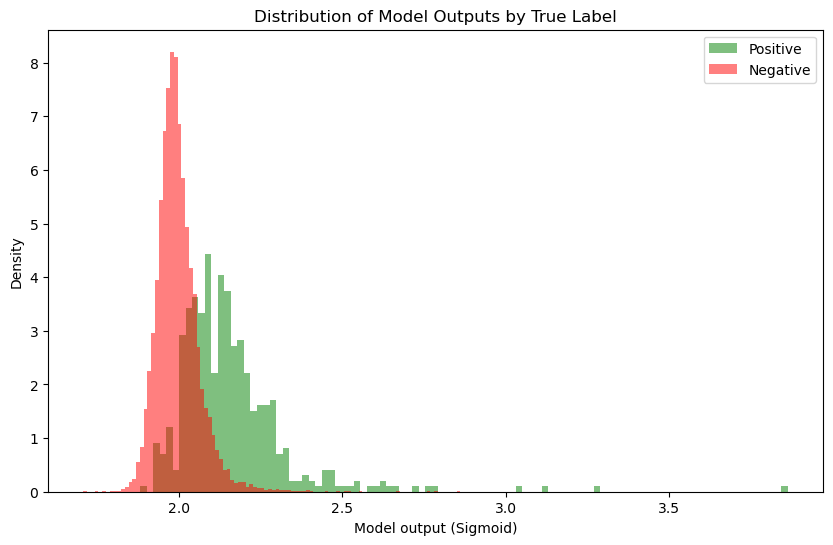

Average loss: 2.0230, Accuracy: 0.0500, TPR10FPR: 0.6900, FPR90TPR: 0.3279, AUC: 0.8815
Number of deleted watermarks: 2.0
Epoch 11 loss_neg: 26.8096, loss_pos: 288.2564, total_loss: 157.5330
Epoch 12 loss_neg: 26.8949, loss_pos: 286.2561, total_loss: 156.5755
Epoch 13 loss_neg: 25.9695, loss_pos: 290.2567, total_loss: 158.1131
Epoch 14 loss_neg: 24.9452, loss_pos: 290.5068, total_loss: 157.7260
Epoch 15 loss_neg: 27.3052, loss_pos: 287.7563, total_loss: 157.5307
Epoch 16 loss_neg: 28.3500, loss_pos: 289.5067, total_loss: 158.9283
Epoch 17 loss_neg: 29.9709, loss_pos: 284.7560, total_loss: 157.3634
Epoch 18 loss_neg: 24.5467, loss_pos: 286.0061, total_loss: 155.2764
Epoch 19 loss_neg: 22.6051, loss_pos: 289.0067, total_loss: 155.8059
Epoch 20 loss_neg: 24.3486, loss_pos: 289.5067, total_loss: 156.9276
0 16


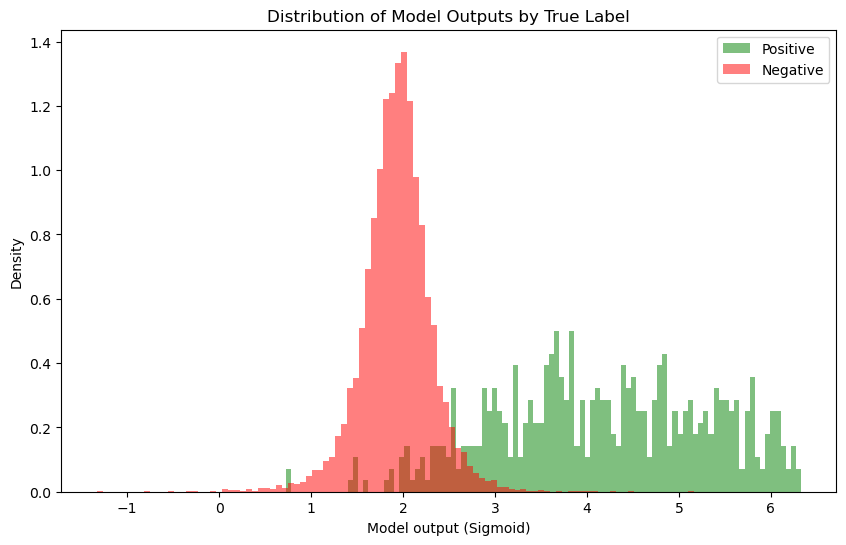

Average loss: 1.9713, Accuracy: 0.0508, TPR10FPR: 0.9440, FPR90TPR: 0.0275, AUC: 0.9700
Number of deleted watermarks: 7.0
Epoch 21 loss_neg: 24.9847, loss_pos: 259.2627, total_loss: 142.1237
Epoch 22 loss_neg: 23.0038, loss_pos: 261.7638, total_loss: 142.3838
Epoch 23 loss_neg: 22.7560, loss_pos: 258.5127, total_loss: 140.6343
Epoch 24 loss_neg: 22.6135, loss_pos: 254.8864, total_loss: 138.7499
Epoch 25 loss_neg: 25.9982, loss_pos: 253.5108, total_loss: 139.7545
Epoch 26 loss_neg: 27.8758, loss_pos: 253.5110, total_loss: 140.6934
Epoch 27 loss_neg: 25.9708, loss_pos: 255.0116, total_loss: 140.4912
Epoch 28 loss_neg: 25.9501, loss_pos: 256.7618, total_loss: 141.3560
Epoch 29 loss_neg: 29.4166, loss_pos: 241.7585, total_loss: 135.5875
Epoch 30 loss_neg: 27.1759, loss_pos: 243.8836, total_loss: 135.5297
4 12


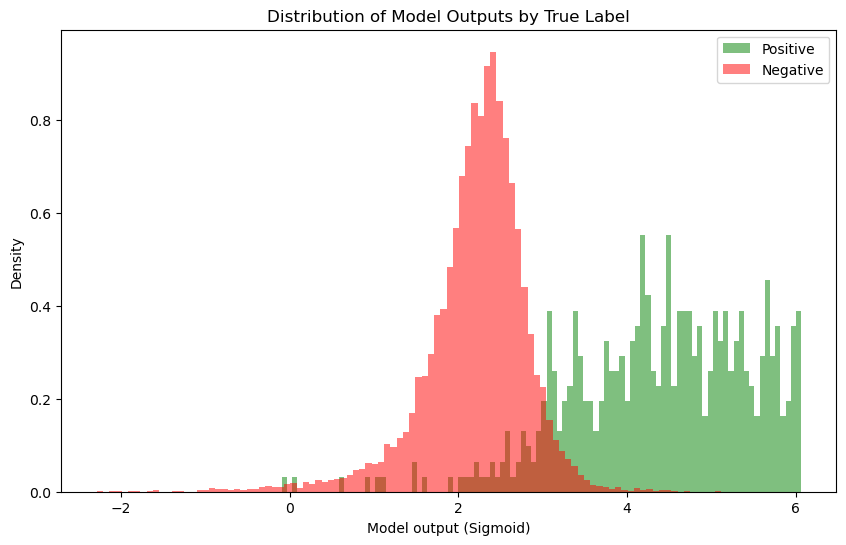

Average loss: 2.2215, Accuracy: 0.0584, TPR10FPR: 0.9320, FPR90TPR: 0.0435, AUC: 0.9605
Number of deleted watermarks: 10.0
Epoch 31 loss_neg: 25.8616, loss_pos: 226.5153, total_loss: 126.1885
Epoch 32 loss_neg: 20.0317, loss_pos: 228.0164, total_loss: 124.0241
Epoch 33 loss_neg: 18.5547, loss_pos: 227.3909, total_loss: 122.9728
Epoch 34 loss_neg: 23.1990, loss_pos: 229.2670, total_loss: 126.2330
Epoch 35 loss_neg: 21.6961, loss_pos: 224.3905, total_loss: 123.0433
Epoch 36 loss_neg: 21.8844, loss_pos: 225.1404, total_loss: 123.5124
Epoch 37 loss_neg: 21.0045, loss_pos: 225.2653, total_loss: 123.1349
Epoch 38 loss_neg: 22.4619, loss_pos: 222.3892, total_loss: 122.4256
Epoch 39 loss_neg: 24.7382, loss_pos: 238.2735, total_loss: 131.5058
Epoch 40 loss_neg: 17.9831, loss_pos: 236.3974, total_loss: 127.1902
6 10


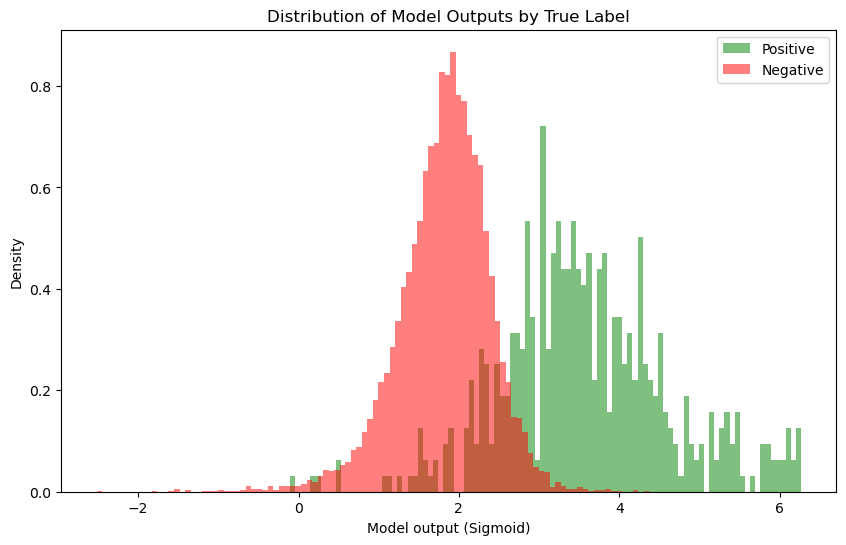

Average loss: 1.8908, Accuracy: 0.0566, TPR10FPR: 0.8780, FPR90TPR: 0.1596, AUC: 0.9411
Number of deleted watermarks: 17.0
Epoch 41 loss_neg: 22.5531, loss_pos: 205.7719, total_loss: 114.1625
Epoch 42 loss_neg: 21.2904, loss_pos: 203.0199, total_loss: 112.1551
Epoch 43 loss_neg: 21.3761, loss_pos: 201.8941, total_loss: 111.6351
Epoch 44 loss_neg: 17.7506, loss_pos: 202.5199, total_loss: 110.1353
Epoch 45 loss_neg: 18.9517, loss_pos: 206.0251, total_loss: 112.4884
Epoch 46 loss_neg: 18.9612, loss_pos: 206.1473, total_loss: 112.5543
Epoch 47 loss_neg: 16.7886, loss_pos: 200.7690, total_loss: 108.7788
Epoch 48 loss_neg: 14.7434, loss_pos: 207.3995, total_loss: 111.0715
Epoch 49 loss_neg: 17.5120, loss_pos: 203.5211, total_loss: 110.5165


In [8]:
from torch.cuda.amp import GradScaler, autocast

model.train()
scaler = GradScaler()
alpha = 0.0
beta = 1.0
for epoch in tqdm(range(epochs), desc='Epochs'):
    model.train()
    for iters, (pos_images, pos_idx, neg_images, neg_labels) in enumerate(offest_dataset_loader):
        pos_images, neg_images = pos_images.to(device), neg_images.to(device)
        
        inter_idx = torch.where(torch.isin(pos_idx, torch.tensor(clean_idx)))[0]
        remain_idx = torch.where(~torch.isin(pos_idx, torch.tensor(clean_idx)))[0]
        if remain_idx.size(0) == 0:
            continue
        neg_batch = neg_images[:remain_idx.size(0)]
        pos_batch = pos_images[remain_idx]
        neg_labels = torch.zeros(neg_batch.size(0), 1).to(device)
        pos_labels = torch.ones(pos_batch.size(0), 1).to(device)
        
        optimizer.zero_grad()
        # Use autocast for the forward pass
        with autocast():
            neg_outputs = model(neg_batch)
            loss_neg = bce_logits(neg_outputs, neg_labels) + lse_loss(neg_outputs)  * beta
            pos_outputs = model(pos_batch)
            loss_pos = criterion(pos_outputs, pos_labels) * beta *40.0 + alpha * bce_logits(pos_outputs, pos_labels)
            total_loss = (loss_neg + loss_pos) / 2

        # Scale the loss, call backward, and step the optimizer            
        scaler.scale(total_loss).backward()
        scaler.step(optimizer)
        scaler.update()
    print(f"Epoch {epoch} loss_neg: {loss_neg.item():.4f}, loss_pos: {loss_pos.item():.4f}, total_loss: {total_loss.item():.4f}")
    
    if epoch % pruning_interval == 0 and epoch > 0:
        print(len(inter_idx), len(remain_idx))
        evaluate_model_binary(model, mix_dataset_loader, device)
        beta = beta * 0.9
        alpha = alpha + 0.05
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
        outputs_list, clean_idx, num_wm = get_ranking_reeval((1-(1-pruning_rate)**int(epoch/pruning_interval)), clean_idx, model, mix_dataset_loader, device)
        model.apply(model._init_weights)
        
        print(f"Number of deleted watermarks: {num_wm}")

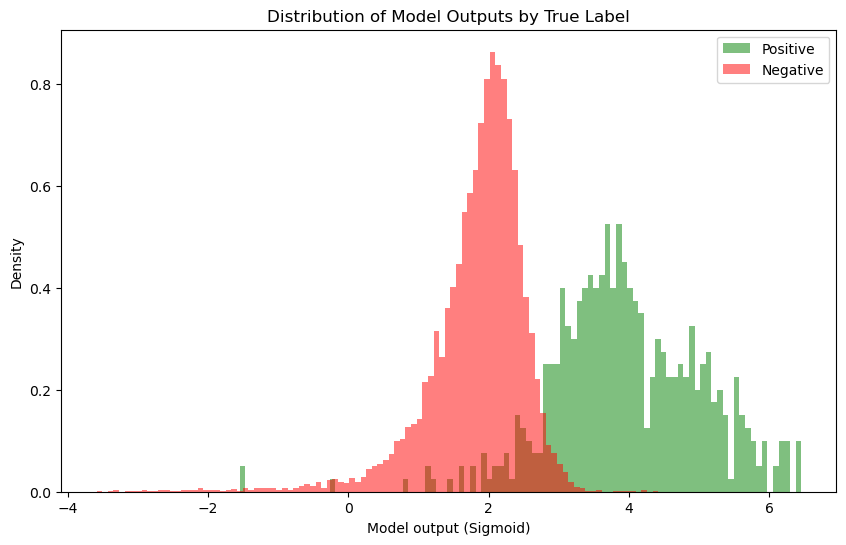

Average loss: 1.9245, Accuracy: 0.0697, TPR10FPR: 0.9340, FPR90TPR: 0.0276, AUC: 0.9648


{'Average Loss': 1.9244897579193114,
 'Accuracy': 0.0697,
 'Precision': 0.05072981524956619,
 'TPR': array([0.   , 0.002, 0.318, 0.318, 0.36 , 0.36 , 0.364, 0.364, 0.368,
        0.368, 0.428, 0.428, 0.44 , 0.44 , 0.474, 0.474, 0.52 , 0.52 ,
        0.632, 0.632, 0.64 , 0.64 , 0.668, 0.668, 0.72 , 0.72 , 0.724,
        0.724, 0.726, 0.726, 0.742, 0.742, 0.744, 0.744, 0.746, 0.746,
        0.758, 0.758, 0.766, 0.766, 0.78 , 0.78 , 0.782, 0.782, 0.786,
        0.786, 0.792, 0.792, 0.794, 0.794, 0.796, 0.796, 0.798, 0.798,
        0.8  , 0.8  , 0.808, 0.808, 0.812, 0.812, 0.816, 0.816, 0.818,
        0.818, 0.822, 0.822, 0.824, 0.824, 0.826, 0.826, 0.828, 0.828,
        0.83 , 0.83 , 0.832, 0.832, 0.836, 0.836, 0.838, 0.838, 0.844,
        0.844, 0.846, 0.846, 0.848, 0.848, 0.85 , 0.85 , 0.852, 0.852,
        0.854, 0.854, 0.856, 0.856, 0.858, 0.858, 0.86 , 0.86 , 0.862,
        0.862, 0.868, 0.868, 0.87 , 0.87 , 0.872, 0.872, 0.876, 0.876,
        0.878, 0.878, 0.88 , 0.88 , 0.882, 0.882

In [9]:
mix_dataset_loader = torch.utils.data.DataLoader(mix_dataset, batch_size=batch_size, shuffle=True, num_workers=8)
evaluate_model_binary(model, mix_dataset_loader, device)